In [1]:
# Runs multiple output commands in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
from matplotlib import pyplot

In [11]:
%run -i 'DataLoader.py'

In [3]:
# # If data not on file
# %run -i 'DataPreprocessing.py'
# %run -i 'FeatureEnginering.py'

# If data already on file
learning_data = pd.read_csv("feature_engineered_data_lag3.csv")

In [4]:
lcopy = learning_data.copy()

In [ ]:
# learning_data = lcopy.copy()

In [5]:
learning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11128004 entries, 0 to 11128003
Data columns (total 94 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   shop_id                                  float64
 1   item_id                                  float64
 2   date_block_num                           float64
 3   month                                    float64
 4   year                                     float64
 5   days_in_month                            int64  
 6   item_cnt_day                             float64
 7   item_price                               float64
 8   daily_revenue                            float64
 9   item_category_id                         int64  
 10  name2                                    int64  
 11  name3                                    int64  
 12  item_category_name                       object 
 13  category_type                            object 
 14  category_type_en

In [ ]:
features_to_drop = ['item_price','daily_revenue','category_type','category_sub-type','shop_city','item_cnt_avg_month','item_cnt_avg_item_month','item_cnt_avg_shop_month','item_cnt_avg_category_month','item_cnt_avg_categorytype_month','item_cnt_avg_categorysubtype_month','item_cnt_avg_shopcity_month','item_category_name', 'shop_name', 'shop_category'];
learning_data = learning_data.drop(features_to_drop, axis=1);
learning_data = learning_data.rename(columns={'item_cnt_day':'item_cnt_month'});
learning_data.fillna(0,inplace=True)

In [6]:
# Features to have
learning_data = learning_data[['item_cnt_day','delta_price_lag_1','item_id','date_block_num','days_in_month','item_cnt_day_lag1','item_cnt_day_lag2','item_cnt_day_lag3','item_category_id','shop_id','category_sub-type_encoded','month','name2','name3','category_type_encoded','shop_city_encoded','daily_revenue_lag1','item_cnt_avg_month_lag1','item_cnt_avg_item_month_lag1','item_cnt_avg_item_month_lag2','item_cnt_avg_item_month_lag3','item_cnt_avg_shop_month_lag1','item_cnt_avg_shop_month_lag2','item_cnt_avg_shop_month_lag3','item_cnt_avg_shopcity_month_lag1','item_cnt_avg_shopitem_month_lag1','item_cnt_avg_shopitem_month_lag2','item_cnt_avg_shopitem_month_lag3','item_cnt_avg_shopcityitem_month_lag1','item_cnt_avg_shopcitytype_month_lag1','item_cnt_avg_shopcitysubtype_month_lag1','item_shop_first_sale','item_first_sale']]

learning_data = learning_data.rename(columns={'item_cnt_day':'item_cnt_month'});
learning_data.fillna(0,inplace=True)

In [7]:
# Separating data into train, validation, test
X_train = learning_data[learning_data['date_block_num'] < 33].drop(['item_cnt_month'], axis=1)
Y_train = learning_data[learning_data['date_block_num'] < 33]['item_cnt_month']
X_valid = learning_data[learning_data['date_block_num'] == 33].drop(['item_cnt_month'], axis=1)
Y_valid = learning_data[learning_data['date_block_num'] == 33]['item_cnt_month']
X_test = learning_data[learning_data['date_block_num'] == 34].drop(['item_cnt_month'], axis=1)

In [8]:
import xgboost as xgb

model = xgb.XGBRegressor(max_depth=10,n_estimators=1000,min_child_weight=0.5, colsample_bytree=0.8, subsample=0.8, eta=0.1,seed=42)

[23:15:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { num_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:1.08446	validation_1-rmse:1.04387
[1]	validation_0-rmse:0.99799	validation_1-rmse:0.97820
[2]	validation_0-rmse:0.94404	validation_1-rmse:0.94867
[3]	validation_0-rmse:0.91130	validation_1-rmse:0.93035
[4]	validation_0-rmse:0.89178	validation_1-rmse:0.91952
[5]	validation_0-rmse:0.87774	validation_1-rmse:0.91743
[6]	validation_0-rmse:0.86910	validation_1-rmse:0.91227
[7]	validation_0-rmse:0.86262	validation_1-rmse:0.91102
[8]	validation_0-rmse:0.85600	validation_1-rmse:0.90931
[9]	validation_0-rmse:0.85006	validation_1-rmse:0.90562
[10]	validation_0-rmse:0.84594	validation_1-rmse:0.90584
[11]	validation_0-rmse:0

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=0.5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, num_round=1000,
             random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=1, subsample=1, tree_method='approx', validate_parameters=1,
             verbosity=None)

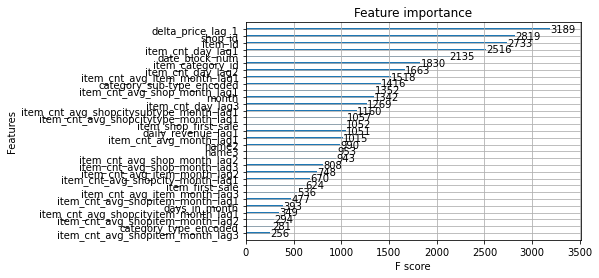

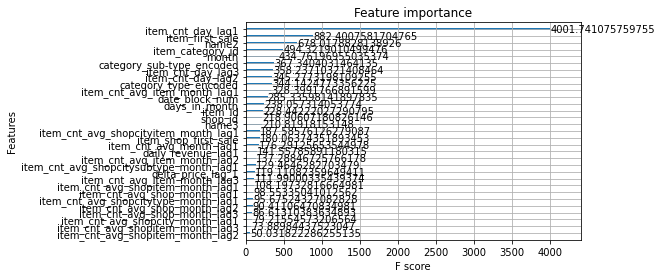

In [9]:
xgb.plot_importance(model);
xgb.plot_importance(model,importance_type="gain");

In [13]:
predictions = model.predict(X_test)
submission = pd.DataFrame({'ID': test.index, 'item_cnt_month': predictions})
submission['item_cnt_month'] = submission['item_cnt_month'].clip(0,20)
submission.to_csv('xgb_lag3t.csv',index=False) 